In [3]:
import os
import pandas as pd
from bbox import * 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
#for image inpainting
from skimage import data
from skimage.morphology import disk, binary_dilation
from skimage.restoration import inpaint
import cv2 as cv


In [6]:
ds = xr.open_dataset(f'../../data/full_month_data/model_2023-09.nc')


In [7]:
ds

<xarray.Dataset> Size: 20GB
Dimensions:                                        (time: 192, lat: 479,
                                                    lon: 1059)
Coordinates:
  * time                                           (time) datetime64[ns] 2kB ...
  * lat                                            (lat) float64 4kB 28.61 .....
  * lon                                            (lon) float64 8kB -98.89 ....
    band                                           int64 8B ...
    spatial_ref                                    int64 8B ...
Data variables: (12/39)
    vertical_column_troposphere_tempo              (time, lat, lon) float64 779MB ...
    vertical_column_troposphere_uncertainty_tempo  (time, lat, lon) float64 779MB ...
    vertical_column_stratosphere_tempo             (time, lat, lon) float64 779MB ...
    main_data_quality_flag_tempo                   (time, lat, lon) float32 390MB ...
    vertical_column_total_tempo                    (time, lat, lon) float64 779MB ...
    eff_cloud_fraction_tempo                       (time, lat, lon) float32 390MB ...
    ...                                             ...
    population                                     (time, lon, lat) float32 390MB ...
    road_density                                   (time, lat, lon) int32 390MB ...
    water_map_LW                                   (time, lon, lat) float32 390MB ...
    y_sensor_no2                                   (time, lat, lon) float64 779MB ...
    y_sensormobile_no2                             (time, lat, lon) float64 779MB ...
    y_sensormobile_sensor?                         (time, lat, lon) float64 779MB ...
Attributes:
    regrid_method:  bilinear

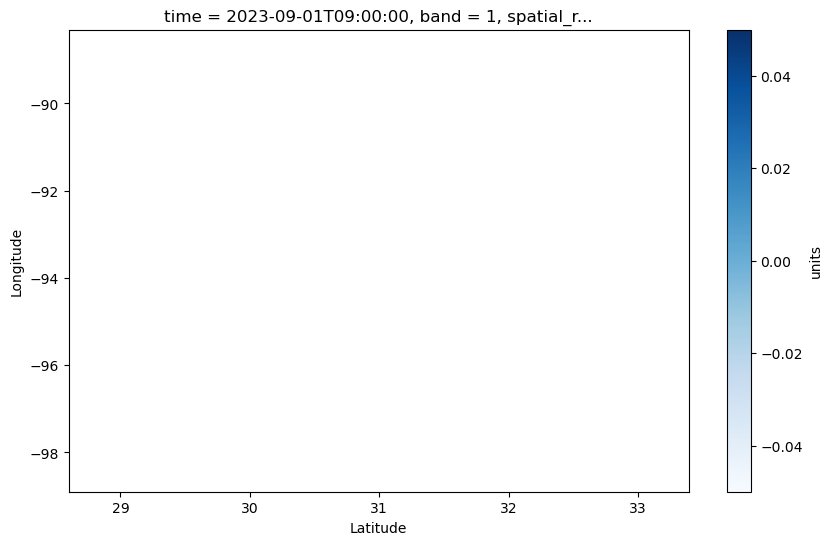

In [35]:
# Drop HCHO
# Add Ammonia
# Add PM25_RH35_GOCART


import matplotlib.pyplot as plt
# # Define your latitude and longitude bounds
# lat_min, lat_max = 28.6, 33.4  # Example latitude range
# lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 0 #Change this to select a different hour if desired
data = ds[f"y_sensormobile_no2"].isel(time=hour_index)
# temperature_data = ds['Percent_Tree_Cover']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
data.T.plot(
    cmap="Blues",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'units'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

In [36]:
ds[f"y_sensor_no2"].isel(time=2).count()

<xarray.DataArray 'y_sensor_no2' ()> Size: 8B
array(53)
Coordinates:
    time         datetime64[ns] 8B 2023-09-01T11:00:00
    band         int64 8B ...
    spatial_ref  int64 8B ...